In [1]:
import quandl

In [2]:
from keras import regularizers
import os
import numpy as np
import pickle
import quandl
from datetime import datetime
import pandas as pd

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
py.init_notebook_mode(connected=True)

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

gt = pd.read_csv("/Users/adicraciun/uf/gt.csv", index_col = 0, dtype = {'interest': np.int32}, parse_dates=['Week'], date_parser=dateparse)
resampler = gt.resample("D")
gt = resampler.interpolate()

drange = pd.date_range(start='5/3/2017', end='5/1/2019')
add = pd.DataFrame(data=np.nan,index=drange,columns=["interest"])

#gt = gt.join(add, how="right", rsuffix="2").drop(columns=["interest2"])
#//gt = gt.interpolate(limit_direction="both")


In [5]:
quandl.ApiConfig.api_key = '4pu6jinV3sHAFCotMPy_'
btc_usd_price_kraken = quandl.get('BCHARTS/KRAKENUSD', start_date='2014-11-20', end_date='2019-03-01')

btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])

In [6]:
data = btc_usd_price_kraken
#data = data.join(gt)
data2 = data

data = data.dropna().diff()

#data = data.drop(columns=['Bitcoin: (Worldwide)'])
data2

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-11-20,389.99797,389.99797,354.32911,354.38194,67.067898,2.455989e+04,366.194482
2014-11-21,350.40522,360.00000,342.65995,360.00000,1.642000,5.870644e+02,357.530097
2014-11-22,360.00000,369.99999,360.00000,369.99999,4.050000,1.459461e+03,360.360731
2014-11-23,360.00000,370.00000,360.00000,370.00000,4.764015,1.747898e+03,366.896030
2014-11-24,370.00000,385.00001,370.00000,372.00001,11.240753,4.219660e+03,375.389465
2014-11-25,389.99000,390.00000,376.00000,376.00000,10.132409,3.932921e+03,388.152615
2014-11-26,372.00000,389.94381,366.42120,372.87268,19.237670,7.396477e+03,384.478832
2014-11-27,385.68775,385.68775,365.01441,376.90071,2.381852,8.952507e+02,375.863197
2014-11-28,380.00000,387.00000,360.52323,387.00000,23.273363,8.810113e+03,378.549187


In [7]:
target = data["Weighted Price"].shift(-1).dropna()

In [8]:
train_size = int(len(btc_usd_price_kraken) * 0.60)

In [9]:
ma3 = data.rolling(3).mean().dropna()
ma7 = data.rolling(7).mean().dropna()

In [10]:
dataset = pd.merge(ma3, ma7, right_index=True, left_index=True)
dataset = pd.merge(dataset, data, right_index=True, left_index=True)
dataset = pd.merge(dataset, target.to_frame(), right_index=True, left_index=True)
# dataset = pd.merge(ma3, target.to_frame(), right_index=True, left_index=True)
dataset

,Open_x,High_x,Low_x,Close_x,Volume (BTC)_x,Volume (Currency)_x,Weighted Price_x,Open_y,High_y,Low_y,...,Volume (Currency)_y,Weighted Price_y,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price_x,Weighted Price_y
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-27,5.229250,0.229247,-1.661863,1.633567,-2.952967,-1.108137e+03,0.157911,-0.615746,-0.615746,1.526471,...,-3.380663e+03,1.381245,13.68775,-4.25606,-1.40679,4.02803,-16.855818,-6.501226e+03,-8.615634,2.685990
2014-11-28,-3.330000,-1.000000,-5.158923,3.666667,4.380318,1.625731e+03,-3.201142,4.227826,3.857143,2.551897,...,1.174721e+03,3.002727,-5.68775,1.31225,-4.49118,10.09929,20.891511,7.914862e+03,2.685990,6.584431
2014-11-29,4.999667,-0.981270,4.221330,2.070837,-5.012937,-1.926452e+03,0.218262,3.857000,2.428573,2.726456,...,2.252305e+01,3.538984,6.99900,0.00000,18.56196,-7.91481,-19.074503,-7.192990e+03,6.584431,1.185952
2014-11-30,0.210607,0.210607,7.101720,3.139620,-0.793419,-2.982114e+02,3.485458,3.759939,2.331367,3.759939,...,-2.496117e+02,2.774791,-0.67943,-0.68043,7.23438,7.23438,-4.197265,-1.616506e+03,1.185952,-12.216541
2014-12-01,1.784623,-0.085333,3.202860,-4.324687,-6.365724,-2.415929e+03,-1.482053,2.193410,0.249141,0.018830,...,-3.796193e+02,-0.183777,-0.96570,0.42443,-16.18776,-12.29363,4.174595,1.561709e+03,-12.216541,3.238471
2014-12-02,-2.333000,-0.281910,-2.058417,-1.329363,0.156422,4.811857e+01,-2.597373,-1.427143,-0.549390,-0.441437,...,-3.102061e+02,-1.544445,-5.35387,-0.58973,2.77813,1.07116,0.491937,1.991527e+02,3.238471,-0.918586
2014-12-03,-3.676227,-0.478630,-4.954503,-2.106523,7.542303,2.839090e+03,-3.298885,0.470127,-0.722876,0.719266,...,1.602015e+02,-1.150845,-4.70911,-1.27059,-1.45388,4.90290,17.960378,6.756410e+03,-0.918586,-5.814614
2014-12-04,-1.784623,-2.248000,-1.804300,1.907450,-0.137719,-5.590485e+01,-1.164910,-0.812536,-0.812536,-0.042214,...,7.133716e+01,-0.750700,4.70911,-4.88368,-6.73715,-0.25171,-18.865473,-7.123277e+03,-5.814614,6.997145
2014-12-05,-0.083913,-2.051423,0.758647,0.029597,0.004914,2.266384e+00,0.087982,-0.035963,-1.000000,2.094664,...,-1.005976e+03,-0.134820,-0.25174,0.00000,10.46697,-4.56240,0.919838,3.736664e+02,6.997145,6.372143


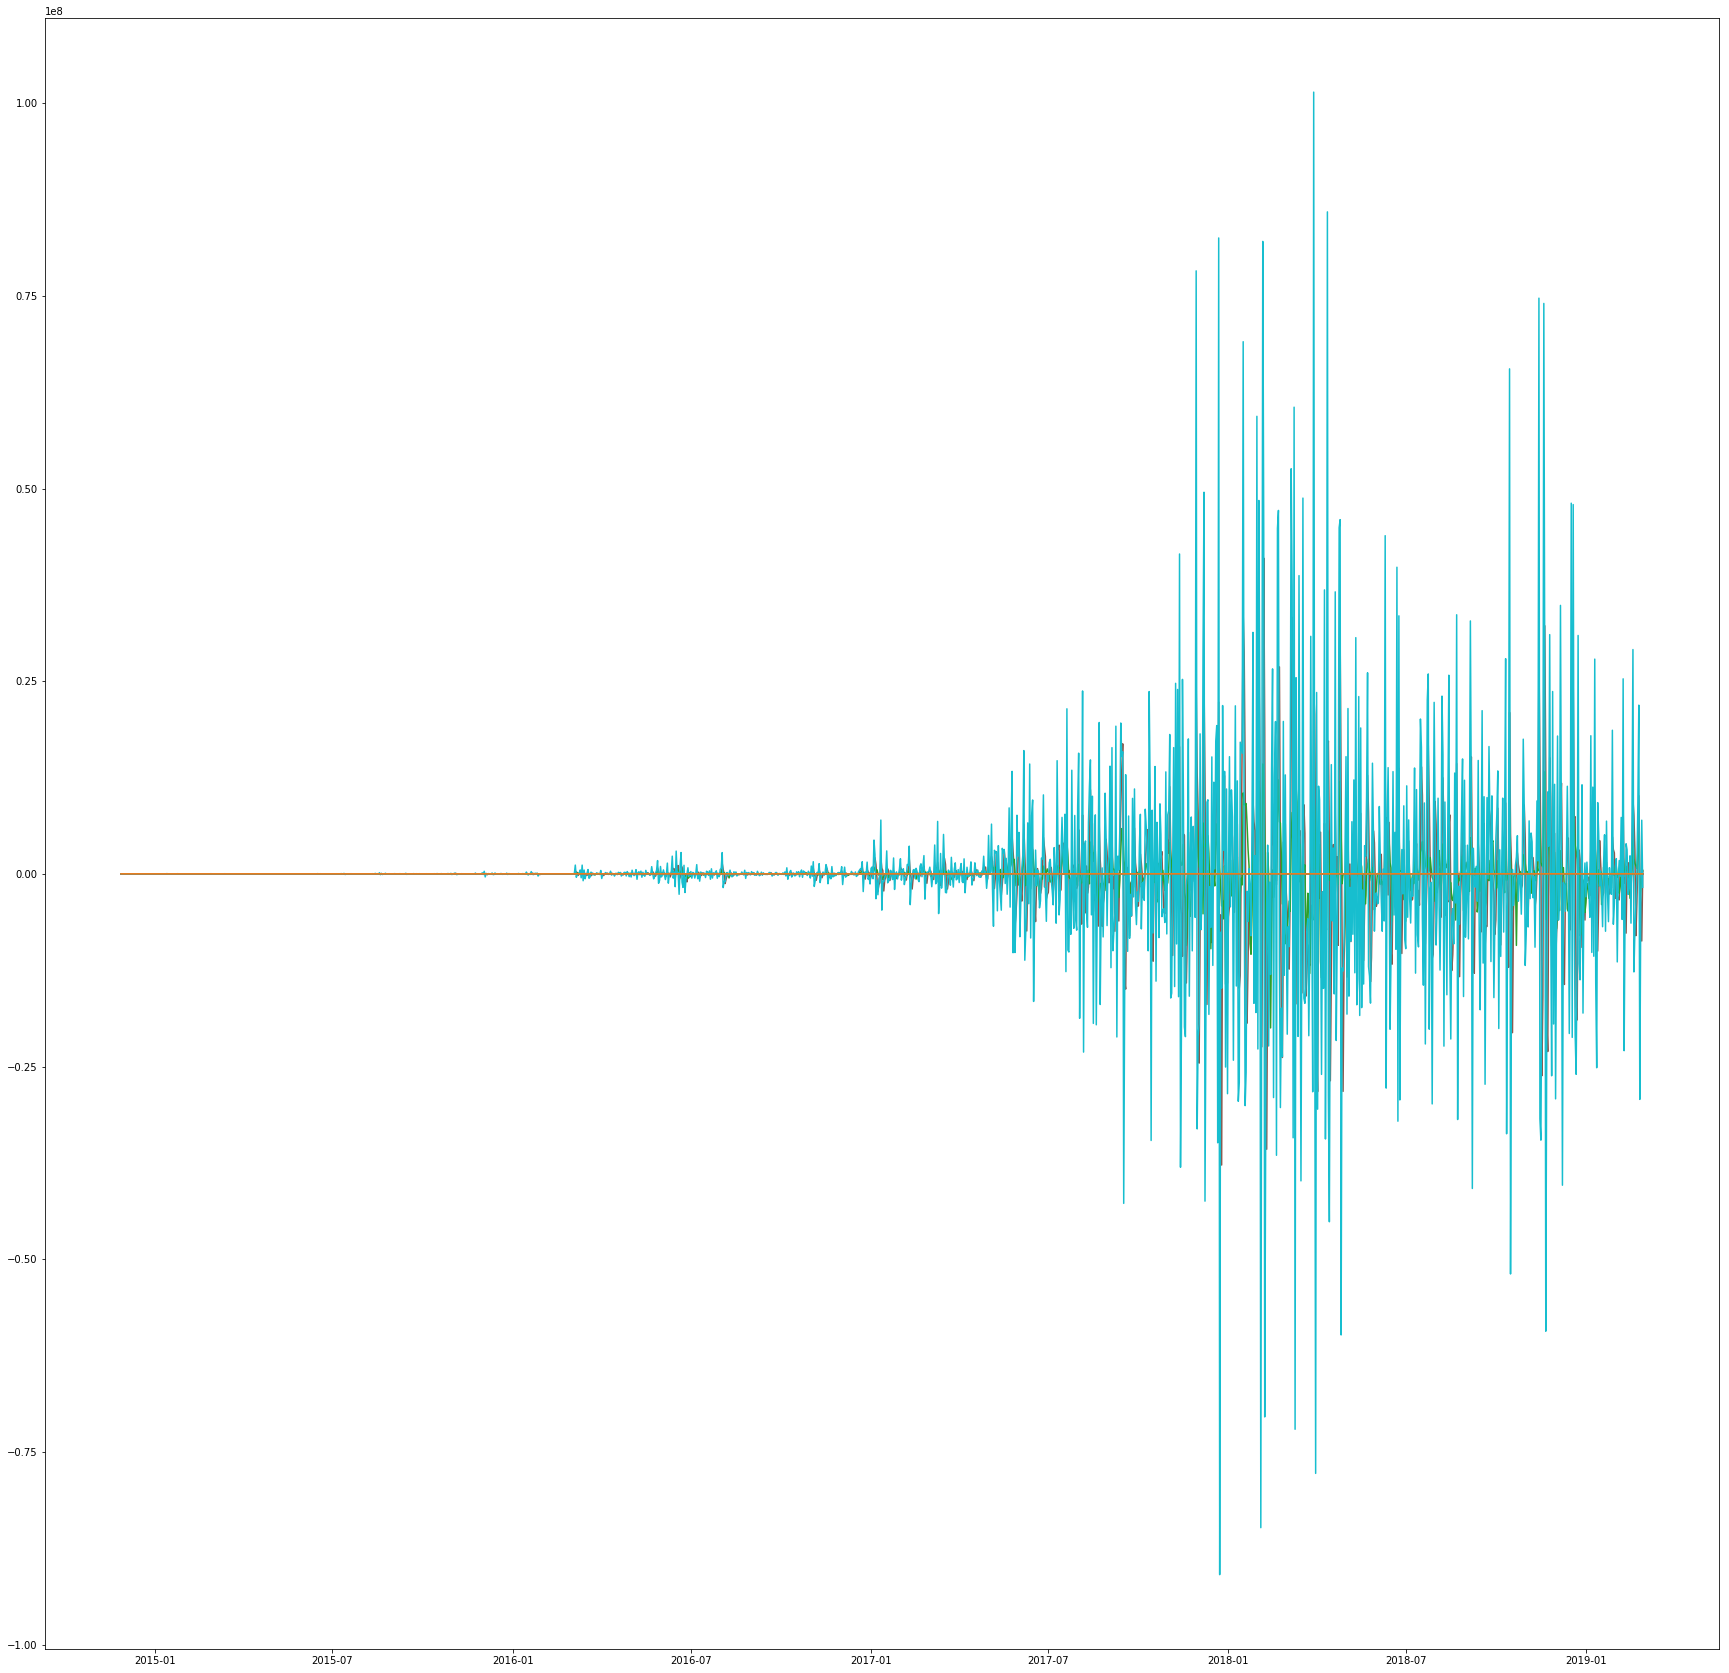

In [11]:
plt.figure(figsize=(30,30))
plt.plot(dataset)

In [12]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
X

,Open_x,High_x,Low_x,Close_x,Volume (BTC)_x,Volume (Currency)_x,Weighted Price_x,Open_y,High_y,Low_y,...,Volume (BTC)_y,Volume (Currency)_y,Weighted Price_y,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price_x
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-27,5.229250,0.229247,-1.661863,1.633567,-2.952967,-1.108137e+03,0.157911,-0.615746,-0.615746,1.526471,...,-9.240864,-3.380663e+03,1.381245,13.68775,-4.25606,-1.40679,4.02803,-16.855818,-6.501226e+03,-8.615634
2014-11-28,-3.330000,-1.000000,-5.158923,3.666667,4.380318,1.625731e+03,-3.201142,4.227826,3.857143,2.551897,...,3.090195,1.174721e+03,3.002727,-5.68775,1.31225,-4.49118,10.09929,20.891511,7.914862e+03,2.685990
2014-11-29,4.999667,-0.981270,4.221330,2.070837,-5.012937,-1.926452e+03,0.218262,3.857000,2.428573,2.726456,...,0.021266,2.252305e+01,3.538984,6.99900,0.00000,18.56196,-7.91481,-19.074503,-7.192990e+03,6.584431
2014-11-30,0.210607,0.210607,7.101720,3.139620,-0.793419,-2.982114e+02,3.485458,3.759939,2.331367,3.759939,...,-0.680346,-2.496117e+02,2.774791,-0.67943,-0.68043,7.23438,7.23438,-4.197265,-1.616506e+03,1.185952
2014-12-01,1.784623,-0.085333,3.202860,-4.324687,-6.365724,-2.415929e+03,-1.482053,2.193410,0.249141,0.018830,...,-1.009223,-3.796193e+02,-0.183777,-0.96570,0.42443,-16.18776,-12.29363,4.174595,1.561709e+03,-12.216541
2014-12-02,-2.333000,-0.281910,-2.058417,-1.329363,0.156422,4.811857e+01,-2.597373,-1.427143,-0.549390,-0.441437,...,-0.780612,-3.102061e+02,-1.544445,-5.35387,-0.58973,2.77813,1.07116,0.491937,1.991527e+02,3.238471
2014-12-03,-3.676227,-0.478630,-4.954503,-2.106523,7.542303,2.839090e+03,-3.298885,0.470127,-0.722876,0.719266,...,0.484405,1.602015e+02,-1.150845,-4.70911,-1.27059,-1.45388,4.90290,17.960378,6.756410e+03,-0.918586
2014-12-04,-1.784623,-2.248000,-1.804300,1.907450,-0.137719,-5.590485e+01,-1.164910,-0.812536,-0.812536,-0.042214,...,0.197311,7.133716e+01,-0.750700,4.70911,-4.88368,-6.73715,-0.25171,-18.865473,-7.123277e+03,-5.814614
2014-12-05,-0.083913,-2.051423,0.758647,0.029597,0.004914,2.266384e+00,0.087982,-0.035963,-1.000000,2.094664,...,-2.655785,-1.005976e+03,-0.134820,-0.25174,0.00000,10.46697,-4.56240,0.919838,3.736664e+02,6.997145


In [13]:
split = int(len(dataset)*0.6)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train.values.reshape(-1, 1))
# X_test_scaled = sc.transform(X_test.values.reshape(-1, 1))
# Y_train_scaled = sc.transform(Y_train.values.reshape(-1, 1))
# Y_test_scaled = sc.transform(Y_test.values.reshape(-1, 1))

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
# Y_train_scaled = sc.transform(Y_train)
# Y_test_scaled = sc.transform(Y_test)

Y_train_scaled = Y_train.values
Y_test_scaled = Y_test.values

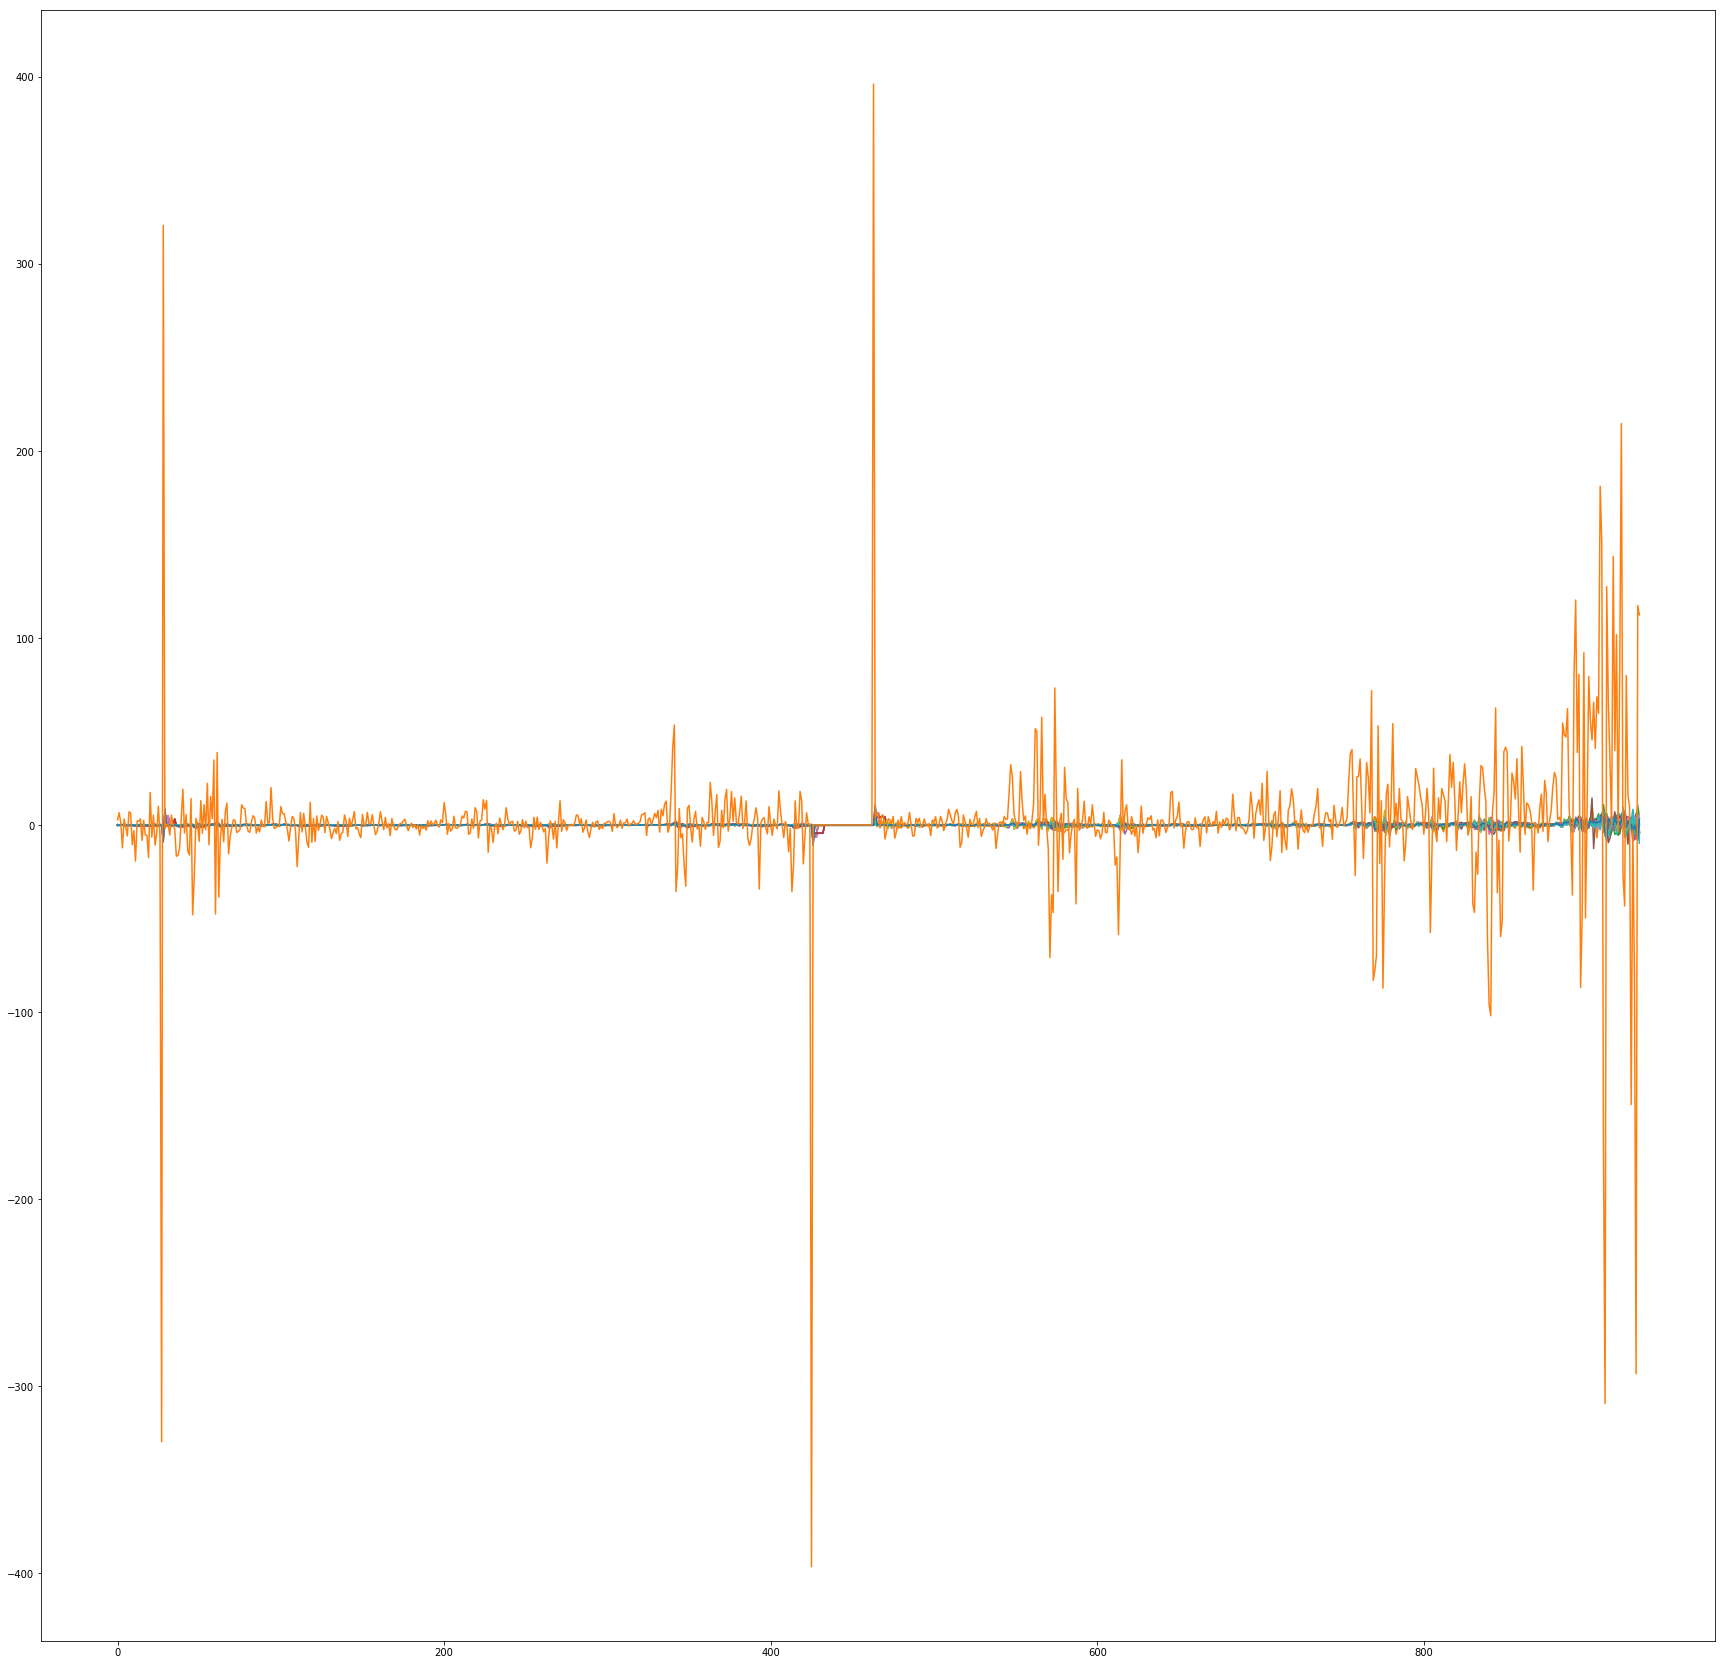

In [14]:
plt.figure(figsize=(30,30))
plt.plot(X_train_scaled)
plt.plot(Y_train_scaled)

In [15]:
classifier = Sequential()
classifier.add(Dense(units = 1000, activation = 'tanh', kernel_regularizer=regularizers.l2(0.05), input_dim = X_train_scaled.shape[1]))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 500, activation = 'tanh', kernel_regularizer=regularizers.l2(0.05), input_dim = X_train_scaled.shape[1]))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 100, activation = 'tanh', kernel_regularizer=regularizers.l2(0.05), input_dim = X_train_scaled.shape[1]))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 50, activation = 'linear', kernel_regularizer=regularizers.l2(0.05), input_dim = X_train_scaled.shape[1]))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              22000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
__________

In [16]:
classifier_history = classifier.fit(X_train_scaled, Y_train_scaled, batch_size = 300, epochs = 250, validation_data=(X_test_scaled, Y_test_scaled), shuffle=False)

Train on 933 samples, validate on 622 samples
Epoch 1/250
933/933 [==============================] - 1s 594us/step - loss: 1391.6722 - mean_absolute_error: 13.6841 - val_loss: 266649.2512 - val_mean_absolute_error: 229.6435
Epoch 2/250
933/933 [==============================] - 0s 66us/step - loss: 1376.0264 - mean_absolute_error: 13.5539 - val_loss: 266336.9744 - val_mean_absolute_error: 229.1209
Epoch 3/250
933/933 [==============================] - 0s 69us/step - loss: 1365.5115 - mean_absolute_error: 13.3642 - val_loss: 266077.5392 - val_mean_absolute_error: 228.6649
Epoch 4/250
933/933 [==============================] - 0s 77us/step - loss: 1361.9127 - mean_absolute_error: 13.3995 - val_loss: 265855.7740 - val_mean_absolute_error: 228.2556
Epoch 5/250
933/933 [==============================] - 0s 71us/step - loss: 1344.4033 - mean_absolute_error: 13.2702 - val_loss: 265590.3000 - val_mean_absolute_error: 227.8004
Epoch 6/250
933/933 [==============================] - 0s 67us/step 

Epoch 47/250
933/933 [==============================] - 0s 67us/step - loss: 1239.2860 - mean_absolute_error: 19.1397 - val_loss: 259450.3248 - val_mean_absolute_error: 226.7410
Epoch 48/250
933/933 [==============================] - 0s 71us/step - loss: 1240.7546 - mean_absolute_error: 18.3902 - val_loss: 261191.7371 - val_mean_absolute_error: 229.4515
Epoch 49/250
933/933 [==============================] - 0s 71us/step - loss: 1211.8301 - mean_absolute_error: 18.0048 - val_loss: 259087.5706 - val_mean_absolute_error: 226.0856
Epoch 50/250
933/933 [==============================] - 0s 67us/step - loss: 1348.4974 - mean_absolute_error: 20.3255 - val_loss: 258161.7837 - val_mean_absolute_error: 225.0587
Epoch 51/250
933/933 [==============================] - 0s 67us/step - loss: 1276.6846 - mean_absolute_error: 19.9567 - val_loss: 259911.3162 - val_mean_absolute_error: 227.7075
Epoch 52/250
933/933 [==============================] - 0s 68us/step - loss: 1243.9846 - mean_absolute_error: 

933/933 [==============================] - 0s 70us/step - loss: 1099.4549 - mean_absolute_error: 18.1310 - val_loss: 257071.6791 - val_mean_absolute_error: 224.4067
Epoch 94/250
933/933 [==============================] - 0s 67us/step - loss: 1162.5812 - mean_absolute_error: 19.3123 - val_loss: 257842.5599 - val_mean_absolute_error: 225.8197
Epoch 95/250
933/933 [==============================] - 0s 73us/step - loss: 1110.2333 - mean_absolute_error: 18.2340 - val_loss: 258626.7295 - val_mean_absolute_error: 227.4906
Epoch 96/250
933/933 [==============================] - 0s 73us/step - loss: 1121.0744 - mean_absolute_error: 18.4312 - val_loss: 257588.0533 - val_mean_absolute_error: 225.6967
Epoch 97/250
933/933 [==============================] - 0s 74us/step - loss: 1084.1105 - mean_absolute_error: 17.9900 - val_loss: 257160.1656 - val_mean_absolute_error: 224.1744
Epoch 98/250
933/933 [==============================] - 0s 69us/step - loss: 1087.5892 - mean_absolute_error: 18.6728 - val

Epoch 139/250
933/933 [==============================] - 0s 72us/step - loss: 1067.0773 - mean_absolute_error: 19.0319 - val_loss: 258229.5016 - val_mean_absolute_error: 224.1810
Epoch 140/250
933/933 [==============================] - 0s 81us/step - loss: 1043.7702 - mean_absolute_error: 18.3657 - val_loss: 258476.8446 - val_mean_absolute_error: 224.9957
Epoch 141/250
933/933 [==============================] - 0s 76us/step - loss: 1031.4633 - mean_absolute_error: 18.1093 - val_loss: 258364.1985 - val_mean_absolute_error: 225.9625
Epoch 142/250
933/933 [==============================] - 0s 73us/step - loss: 1094.4980 - mean_absolute_error: 18.7029 - val_loss: 257608.1030 - val_mean_absolute_error: 225.4239
Epoch 143/250
933/933 [==============================] - 0s 79us/step - loss: 1049.1729 - mean_absolute_error: 18.5812 - val_loss: 256927.1175 - val_mean_absolute_error: 223.9161
Epoch 144/250
933/933 [==============================] - 0s 75us/step - loss: 1103.7058 - mean_absolute_e

Epoch 185/250
933/933 [==============================] - 0s 82us/step - loss: 1122.1826 - mean_absolute_error: 19.6188 - val_loss: 257130.6747 - val_mean_absolute_error: 223.0118
Epoch 186/250
933/933 [==============================] - 0s 76us/step - loss: 1059.9931 - mean_absolute_error: 19.3966 - val_loss: 258110.7173 - val_mean_absolute_error: 224.7689
Epoch 187/250
933/933 [==============================] - 0s 74us/step - loss: 1131.4658 - mean_absolute_error: 19.5550 - val_loss: 258262.6468 - val_mean_absolute_error: 225.3893
Epoch 188/250
933/933 [==============================] - 0s 74us/step - loss: 1074.3753 - mean_absolute_error: 18.5777 - val_loss: 257891.0459 - val_mean_absolute_error: 224.2726
Epoch 189/250
933/933 [==============================] - 0s 74us/step - loss: 1165.6188 - mean_absolute_error: 19.8908 - val_loss: 258121.7666 - val_mean_absolute_error: 225.7523
Epoch 190/250
933/933 [==============================] - 0s 71us/step - loss: 1083.9086 - mean_absolute_e

Epoch 231/250
933/933 [==============================] - 0s 90us/step - loss: 1008.7818 - mean_absolute_error: 18.5926 - val_loss: 258442.5240 - val_mean_absolute_error: 227.4956
Epoch 232/250
933/933 [==============================] - 0s 84us/step - loss: 1117.9063 - mean_absolute_error: 19.5726 - val_loss: 258661.8459 - val_mean_absolute_error: 227.5377
Epoch 233/250
933/933 [==============================] - 0s 87us/step - loss: 1079.7948 - mean_absolute_error: 19.6356 - val_loss: 258369.6212 - val_mean_absolute_error: 227.2649
Epoch 234/250
933/933 [==============================] - 0s 75us/step - loss: 1107.3907 - mean_absolute_error: 18.8040 - val_loss: 257922.9470 - val_mean_absolute_error: 226.1145
Epoch 235/250
933/933 [==============================] - 0s 77us/step - loss: 997.5596 - mean_absolute_error: 18.2869 - val_loss: 257726.3131 - val_mean_absolute_error: 224.8409
Epoch 236/250
933/933 [==============================] - 0s 76us/step - loss: 1076.0434 - mean_absolute_er

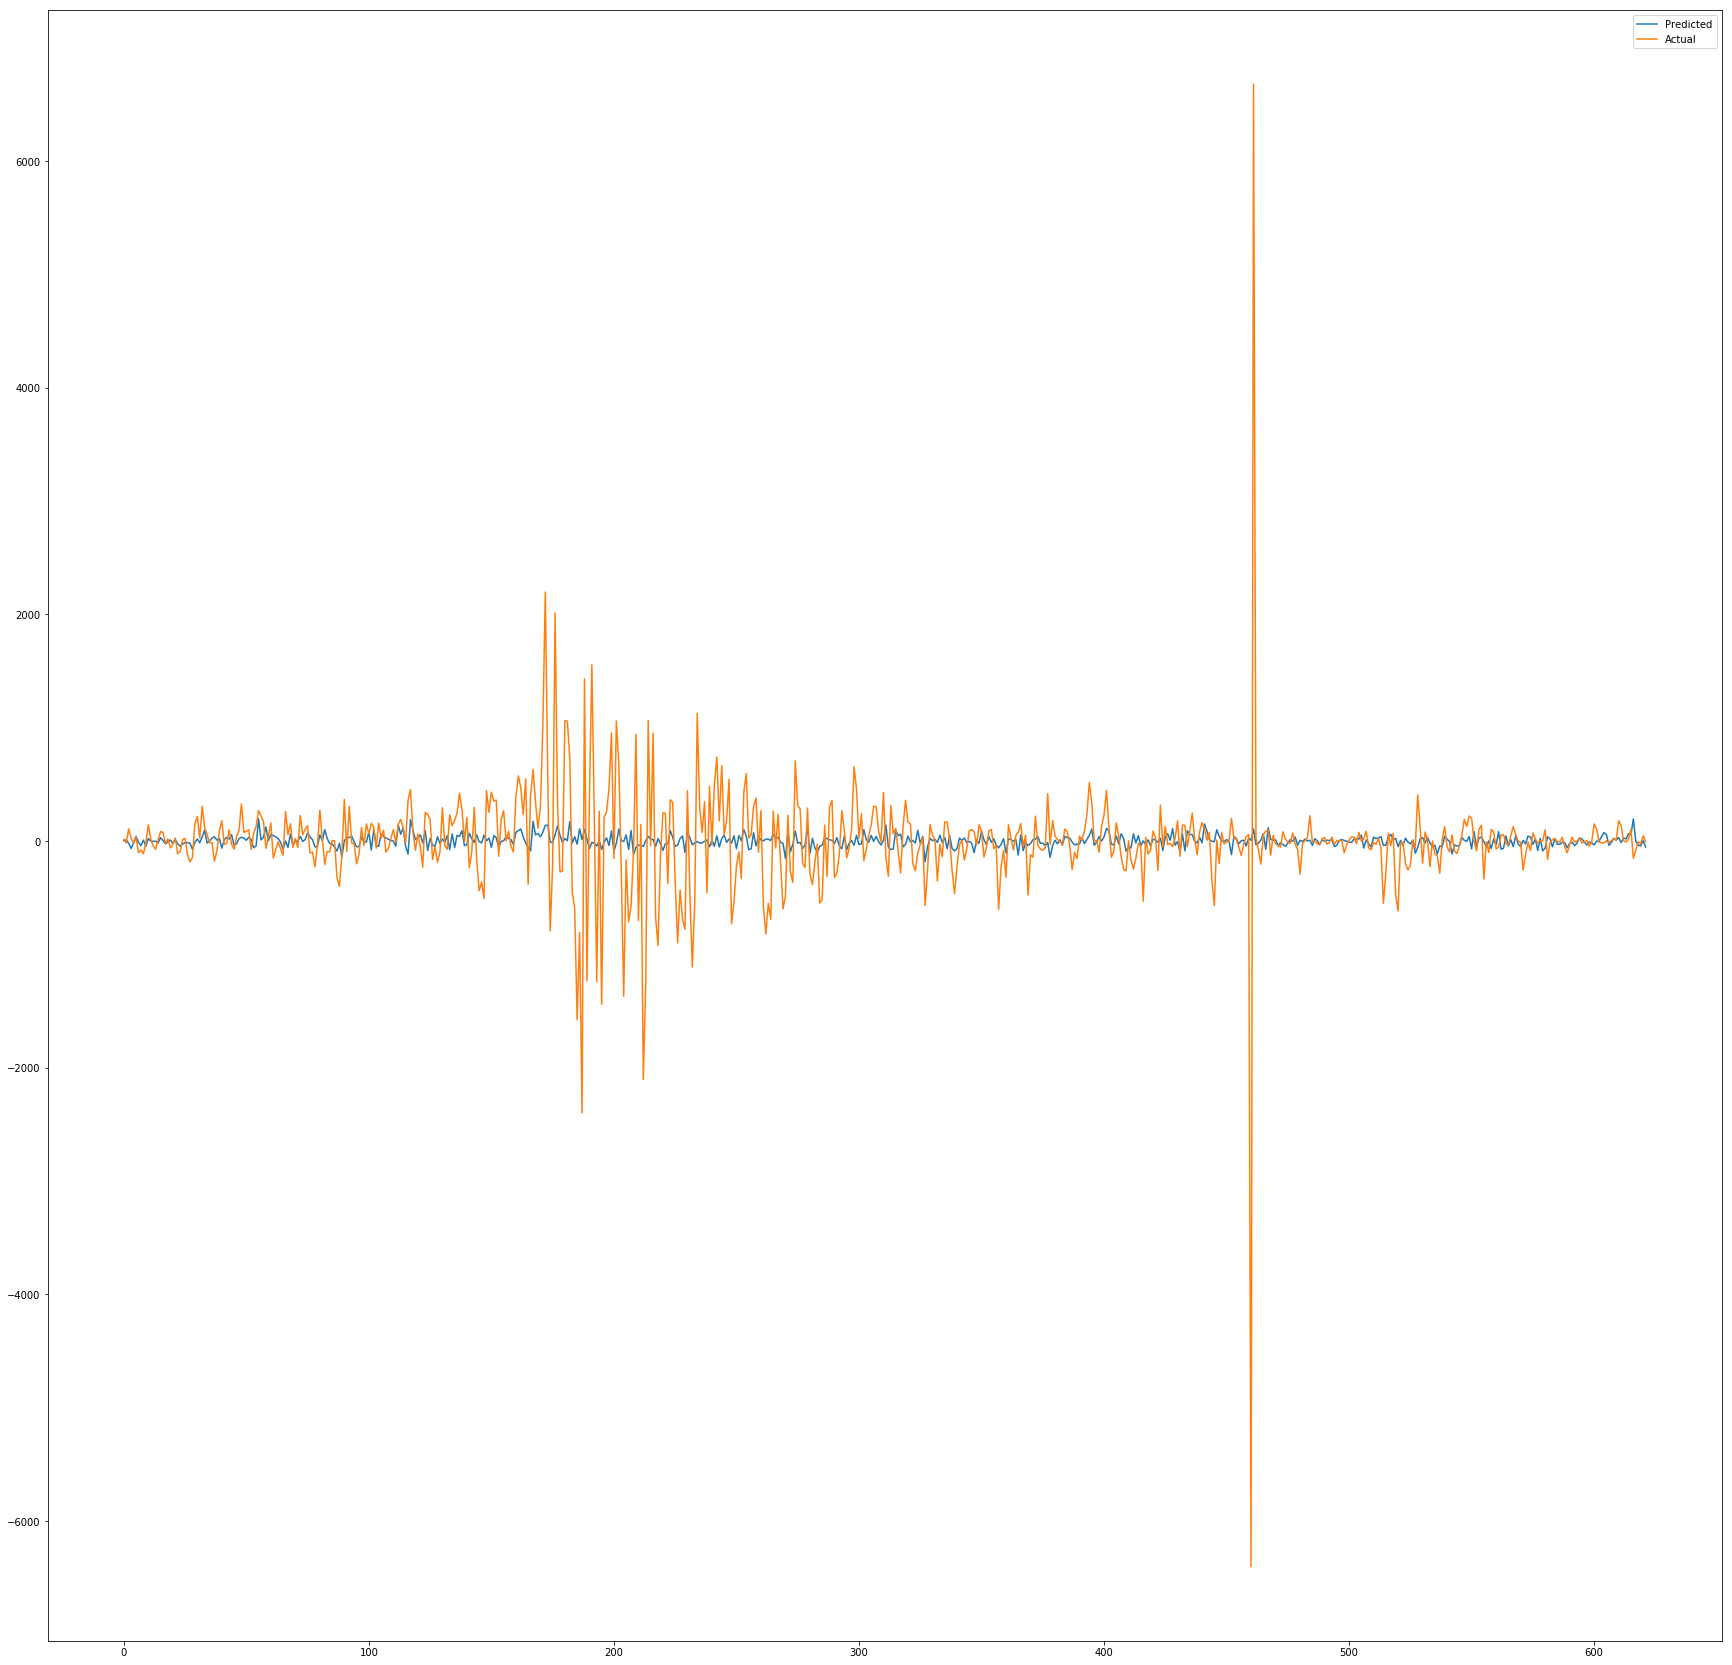

In [17]:
plt.figure(figsize=(30, 30))
plt.plot(classifier.predict(X_test_scaled))
plt.plot(Y_test_scaled)
plt.legend(['Predicted','Actual'])

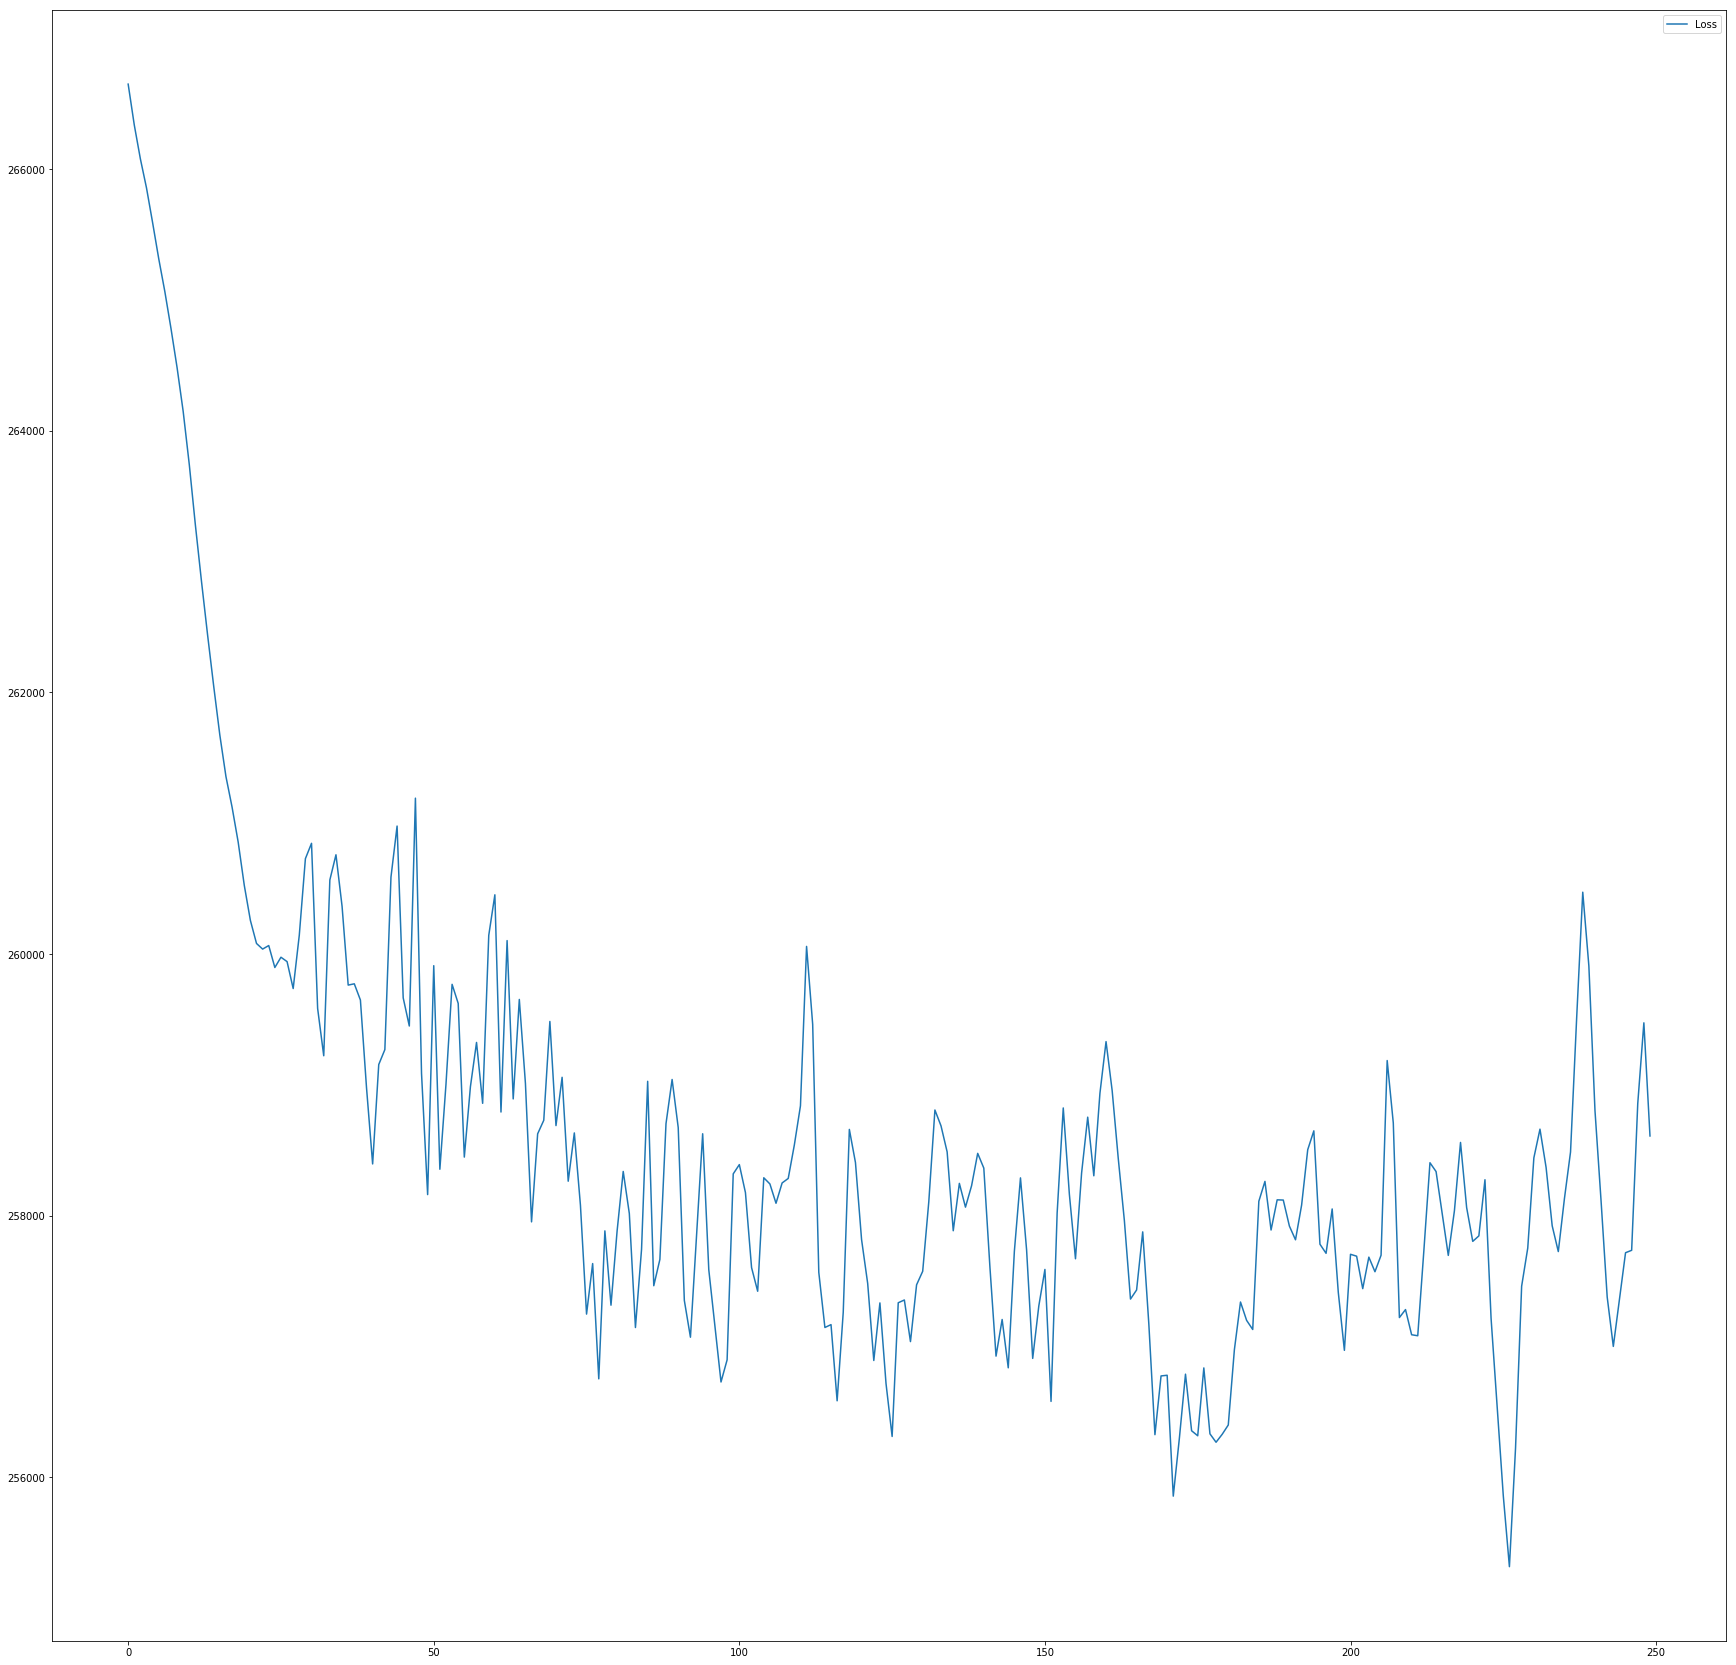

In [18]:
plt.figure(figsize=(30, 30))
plt.plot(classifier_history.history["val_loss"])
#plt.plot(classifier_history.history["val_mean_absolute_error"])
plt.legend(['Loss','Validation loss'])

In [19]:
classifier_history.history["val_mean_absolute_error"]

[229.6434685930945,
 229.12094711107457,
 228.6649393897348,
 228.2556028458083,
 227.80038252214143,
 227.30923936604688,
 226.8456215199167,
 226.326046284372,
 225.76997885750038,
 225.22267964108582,
 224.62570831936657,
 224.03701206955495,
 223.5695550924712,
 223.15905739640115,
 222.7926415569146,
 222.41728027687196,
 222.17747946490812,
 222.0730027201858,
 221.92477689295336,
 221.4581826262152,
 221.0244464812938,
 221.0081157990974,
 221.24711119477004,
 221.65028263594942,
 221.99693277487802,
 222.93463090608358,
 223.2328699854026,
 222.91128140170474,
 224.4972880078282,
 226.1013288589919,
 226.51713618434894,
 224.51207344325024,
 224.6292884311492,
 227.3892636805102,
 227.6311720575167,
 226.41859661727855,
 225.46266893098593,
 226.87466116656827,
 226.12824259080304,
 225.08128526203117,
 224.45791213842068,
 227.1839020658536,
 227.07333158143464,
 228.2383770467384,
 229.7398716966439,
 226.85492956523342,
 226.74104392490202,
 229.45147025546842,
 226.08556294

In [20]:
XC = X_test
XC['prediction'] = classifier.predict(X_test_scaled)

In [21]:
sol = pd.merge(data2, XC,  right_index=True, left_index=True)

In [22]:
sol


,Open_x,High_x,Low_x,Close_x,Volume (BTC)_x,Volume (Currency)_x,Weighted Price,Open_x,High_x,Low_x,...,Volume (Currency)_y,Weighted Price_y,Open_y,High_y,Low_y,Close_y,Volume (BTC)_y,Volume (Currency)_y,Weighted Price_x,prediction
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-17,2470.316,2678.000,2420.891,2642.243,5840.431405,1.493467e+07,2557.118134,-79.894667,-39.967667,34.153667,...,-3.516738e+05,-40.976798,41.596,151.650,112.580,171.940,-2358.692557,-5.110730e+06,112.295536,3.965948
2017-06-18,2646.838,2670.158,2460.001,2497.762,7006.945745,1.801780e+07,2571.419567,63.412000,53.132333,128.224000,...,6.423563e+05,-40.323542,176.522,-7.842,39.110,-144.481,1166.514340,3.083124e+06,14.301433,9.839021
2017-06-19,2500.724,2592.000,2484.822,2584.858,6459.403407,1.649874e+07,2554.220797,24.001333,21.883333,58.837000,...,-1.610844e+06,-21.426570,-146.114,-78.158,24.821,87.096,-547.542338,-1.519055e+06,-17.198770,-20.761290
2017-06-20,2584.859,2768.000,2579.000,2705.100,6385.093055,1.699336e+07,2661.411230,38.181000,30.000000,52.703000,...,-3.512396e+05,-5.729341,84.135,176.000,94.178,120.242,-74.310352,4.946158e+05,107.190433,-65.149384
2017-06-21,2705.100,2764.963,2570.000,2644.968,6443.298219,1.728261e+07,2682.261188,19.420667,31.601667,36.666333,...,-1.390374e+06,8.768551,120.241,-3.037,-9.000,-60.132,58.205164,2.892504e+05,20.849959,-17.372561
2017-06-22,2644.969,2735.310,2588.547,2684.987,4830.253255,1.287693e+07,2665.891906,48.081667,47.770000,34.575000,...,-3.389171e+06,48.332342,-60.131,-29.653,18.547,40.019,-1613.044964,-4.405676e+06,-16.369282,39.934471
2017-06-23,2684.980,2725.000,2660.112,2668.000,3467.611845,9.355392e+06,2697.935125,33.373667,-14.333333,27.037333,...,-1.527145e+06,36.158932,40.011,-10.310,71.565,-16.987,-1362.641409,-3.521541e+06,32.043219,-11.673555
2017-06-24,2668.000,2701.788,2500.000,2547.431,4388.758260,1.139039e+07,2595.356201,-12.366667,-21.058333,-23.333333,...,-5.063260e+05,5.462581,-16.980,-23.212,-160.112,-120.569,921.146415,2.034999e+06,-102.578924,-40.073185
2017-06-25,2555.092,2601.527,2408.000,2490.126,5293.369941,1.331946e+07,2516.253822,-29.959000,-44.594333,-60.182333,...,-6.711907e+05,-7.880821,-112.908,-100.261,-92.000,-57.305,904.611681,1.929071e+06,-79.102378,7.915179


In [23]:
usd = 1000
btc = 0

for index, row in sol.iterrows():
    price = row['Weighted Price'];
    prediction = row['prediction'];
    if prediction > 0 and usd > 0 and price != 0.0:
        btc += usd / price
        usd = 0
    elif prediction < 0 and btc > 0 and price != 0.0:
        usd += btc * price
        btc = 0
    print(usd, btc, price)

0 0.3910652333732786 2557.11813442
0 0.3910652333732786 2571.41956707
998.8669520539546 0 2554.22079697
998.8669520539546 0 2661.41122953
998.8669520539546 0 2682.26118819
0 0.37468396590869874 2665.89190608
1010.8730323768999 0 2697.93512494
1010.8730323768999 0 2595.35620068
0 0.4017373062519893 2516.2538222
965.8071708254512 0 2404.07638473
0 0.4045433874097586 2387.40071123
1023.5789074970825 0 2530.20798103
1023.5789074970825 0 2548.44920589
1023.5789074970825 0 2504.23063915
1023.5789074970825 0 2432.16620613
0 0.419308017052462 2441.11456464
0 0.419308017052462 2524.32839925
1090.2635505966205 0 2600.14954701
1090.2635505966205 0 2577.40744521
0 0.4198289474744164 2596.92324018
1064.7854973058345 0 2536.23649277
0 0.4244653613566449 2508.53330859
1075.6631697292803 0 2534.16006972
1075.6631697292803 0 2421.0639841
1075.6631697292803 0 2329.56724365
1075.6631697292803 0 2340.46895914
1075.6631697292803 0 2364.66148064
1075.6631697292803 0 2245.48310902
1075.6631697292803 0 2061.6

0 3.9574438994359586 3608.8976791486
14295.372836636801 0 3612.2742861053
14295.372836636801 0 3613.9012086829
0 3.8507701672495607 3712.3412241576
0 3.8507701672495607 3550.0217281725
13607.415827352126 0 3533.6868305156
0 3.837426293079581 3545.9745121077
13686.088532613992 0 3566.475936566
13686.088532613992 0 3558.7948701775
13686.088532613992 0 3551.4644528421
13686.088532613992 0 3584.3902802562
13686.088532613992 0 3534.1666798805
13686.088532613992 0 3429.8582982311
13686.088532613992 0 3393.8220667263
13686.088532613992 0 3426.7665951587
13686.088532613992 0 3418.3527504965
0 4.005586377345573 3416.7503190091
0 4.005586377345573 3441.3996850289
13711.068248630725 0 3422.9865385444
13711.068248630725 0 3415.6121775179
13711.068248630725 0 3421.0905035798
13711.068248630725 0 3375.2165568978
13711.068248630725 0 3365.663063905
13711.068248630725 0 3515.9488098228
13711.068248630725 0 3621.9913134859
0 3.792611937515848 3615.2046332511
0 3.792611937515848 3598.6440530417
0 3.7926

In [24]:
btc

0